In [ ]:
%pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn prettytable xgboost

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_csv('../data engineering/reporting/REPORT_final.csv')
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score,retention
0,65438,Alice Wilson,alice.wilson@gmail.com,Sales & Marketing,35,8,0,10,49.0,False
1,65141,Liam Lee,liam.lee@gmail.com,Operations,30,4,0,10,60.0,True
2,7513,Liam Johnson,liam.johnson@gmail.com,Sales & Marketing,34,7,0,10,50.0,False
3,2542,Victor Davis,victor.davis@gmail.com,Sales & Marketing,39,10,0,10,50.0,False
4,48945,David Brooks,david.brooks@gmail.com,Technology,45,2,0,10,73.0,True
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Zach Johnson,zach_johnson723@gmail.com,Technology,48,17,0,10,78.0,True
54804,74592,Frank Davis,frank_davis41@gmail.com,Operations,37,6,0,10,56.0,True
54805,13918,Isabella Edwards,isabella_edwards756@gmail.com,Analytics,27,3,0,10,79.0,True
54806,13614,Uma Wood,uma_wood710@gmail.com,Sales & Marketing,29,2,0,10,0.0,False


In [3]:
data.columns

Index(['employee_id', 'name', 'email', 'designation', 'age',
       'length_of_service', 'is_promoted', 'no_of_trainings',
       'avg_training_score', 'retention'],
      dtype='object')

In [4]:
data.isnull().sum()

employee_id           0
name                  0
email                 0
designation           0
age                   0
length_of_service     0
is_promoted           0
no_of_trainings       0
avg_training_score    0
retention             0
dtype: int64

In [5]:
print('lenght of data is', len(data))

lenght of data is 54808


In [6]:
data.shape

(54808, 10)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   name                54808 non-null  object 
 2   email               54808 non-null  object 
 3   designation         54808 non-null  object 
 4   age                 54808 non-null  int64  
 5   length_of_service   54808 non-null  int64  
 6   is_promoted         54808 non-null  int64  
 7   no_of_trainings     54808 non-null  int64  
 8   avg_training_score  54808 non-null  float64
 9   retention           54808 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 3.8+ MB


In [8]:
data.dtypes

employee_id             int64
name                   object
email                  object
designation            object
age                     int64
length_of_service       int64
is_promoted             int64
no_of_trainings         int64
avg_training_score    float64
retention                bool
dtype: object

In [9]:
np.sum(data.isnull().any(axis=1))


np.int64(0)

In [10]:
data.isnull().sum()


employee_id           0
name                  0
email                 0
designation           0
age                   0
length_of_service     0
is_promoted           0
no_of_trainings       0
avg_training_score    0
retention             0
dtype: int64

In [11]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   10


In [12]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   54808


In [13]:
data.describe()

,employee_id,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.0,54808.000000
mean,39195.830627,34.803915,5.865512,0.085170,10.0,60.736334
std,22586.581449,7.660169,4.265094,0.279137,0.0,18.842781
min,1.000000,20.000000,1.000000,0.000000,10.0,0.000000
25%,19669.750000,29.000000,3.000000,0.000000,10.0,50.000000
50%,39225.500000,33.000000,5.000000,0.000000,10.0,59.000000
75%,58730.500000,39.000000,7.000000,0.000000,10.0,76.000000
max,78298.000000,60.000000,37.000000,1.000000,10.0,99.000000


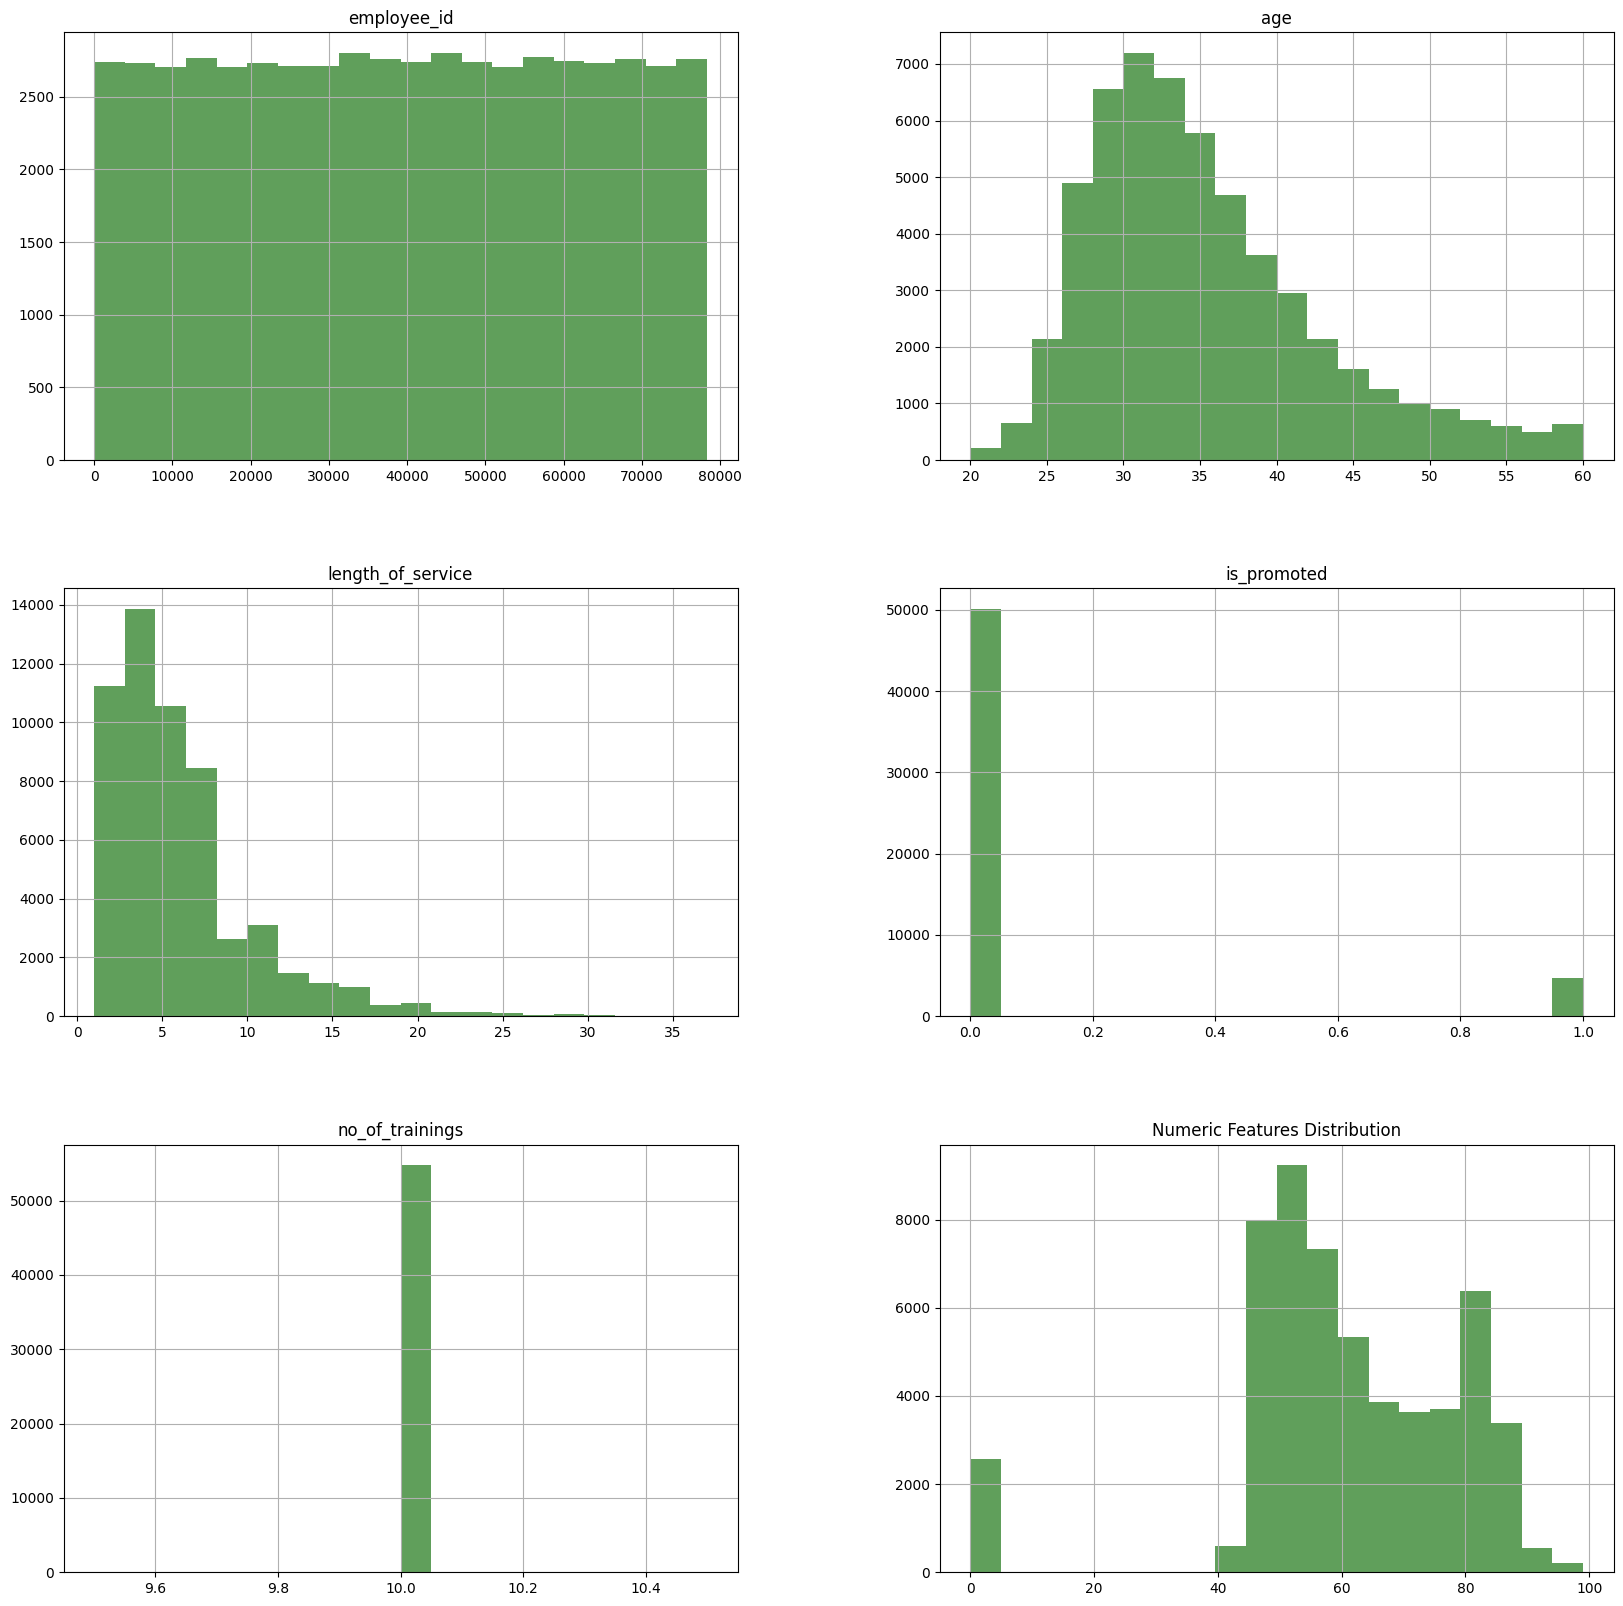

In [14]:
data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

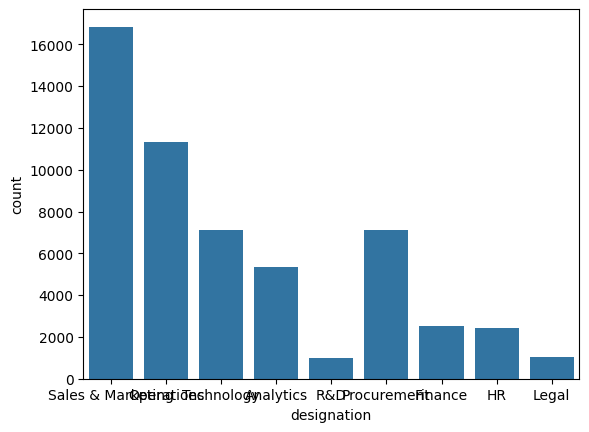

In [15]:
sns.countplot(data= data, x = "designation")
plt.show()

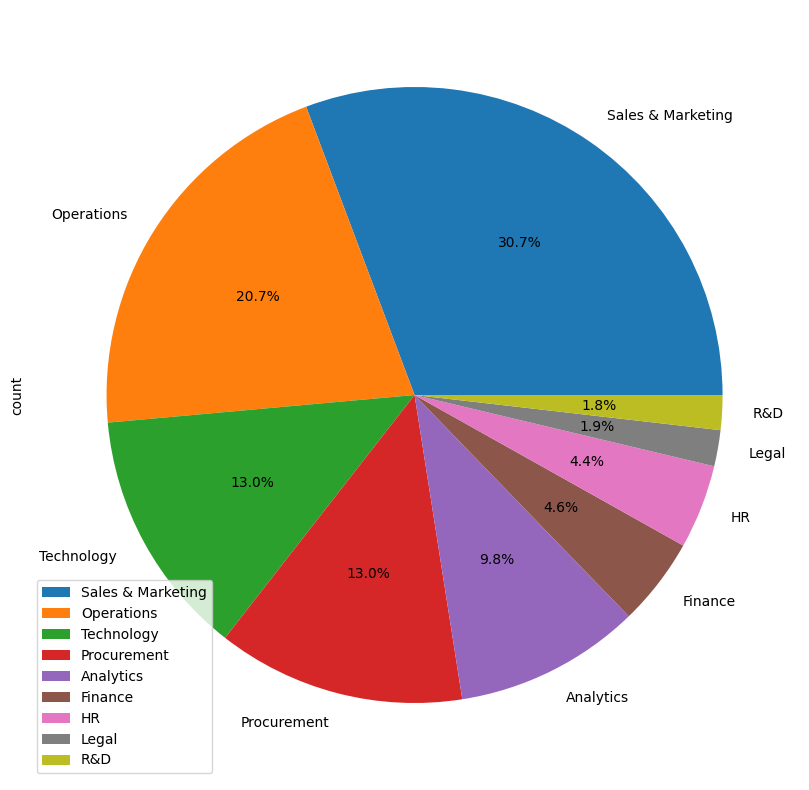

In [16]:
data["designation"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

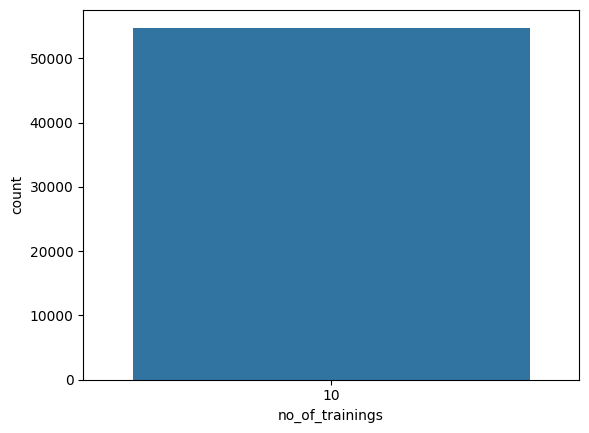

In [17]:
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

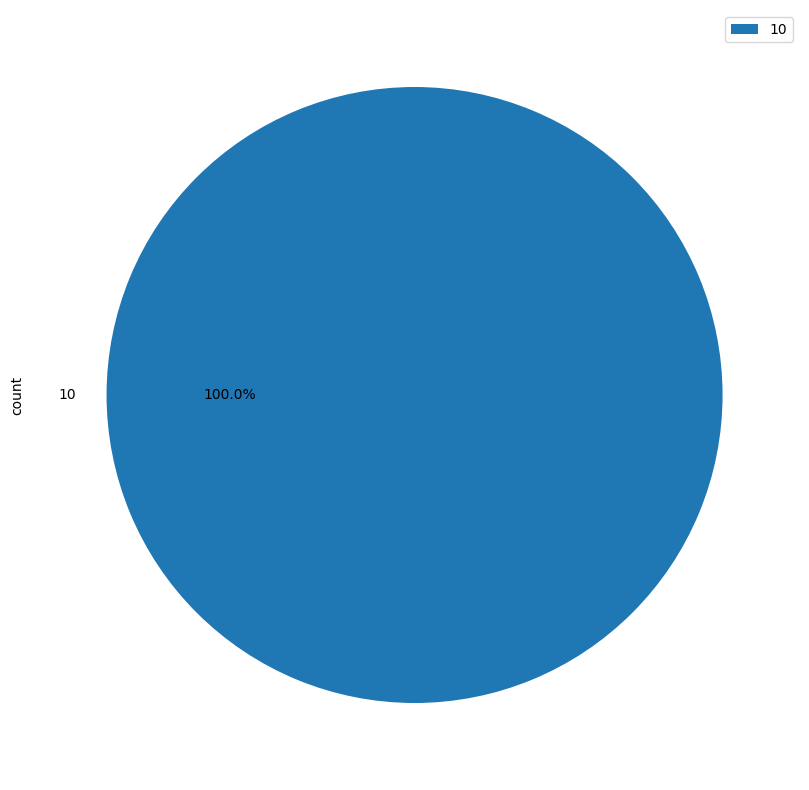

In [18]:
data["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [19]:
# plt.figure(figsize=(12,10))
# sns.countplot(data.age)
# plt.xticks(rotation=90)

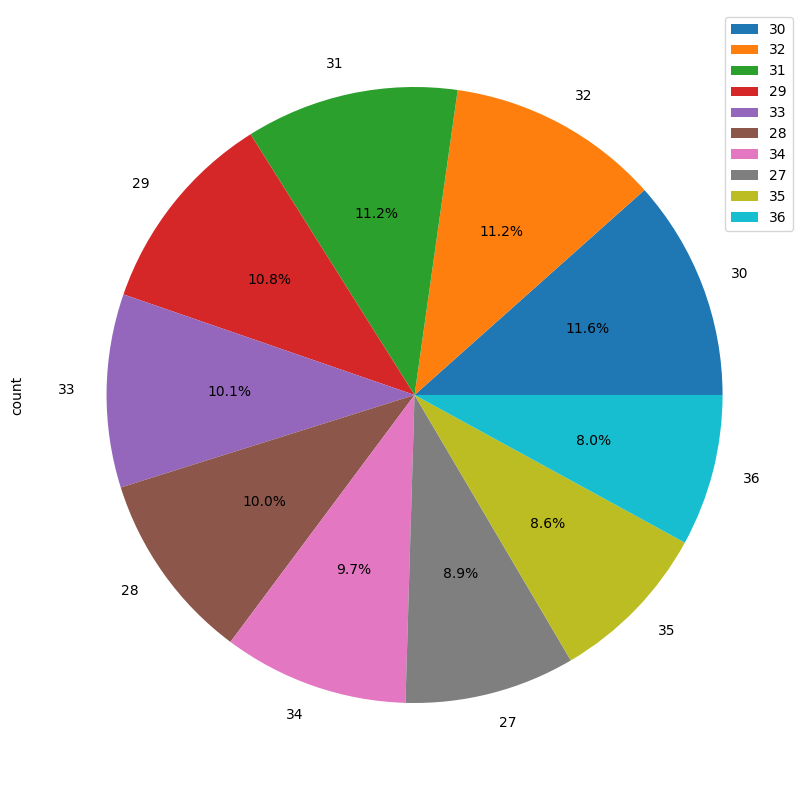

In [20]:
data["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [21]:
# plt.figure(figsize=(12,10))
# sns.countplot(data.length_of_service)
# plt.xticks(rotation=90)

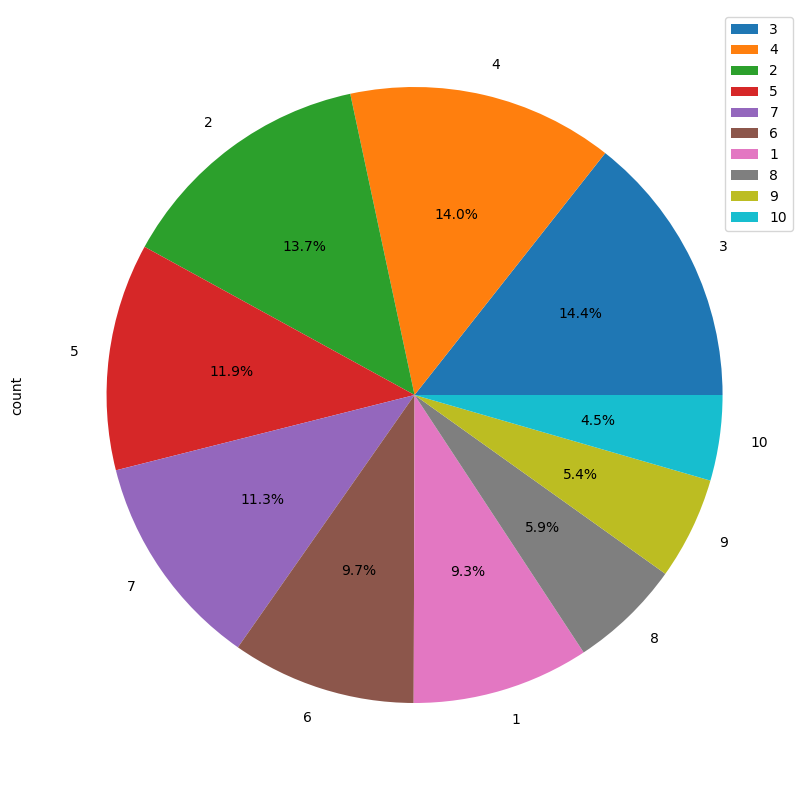

In [22]:
data["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

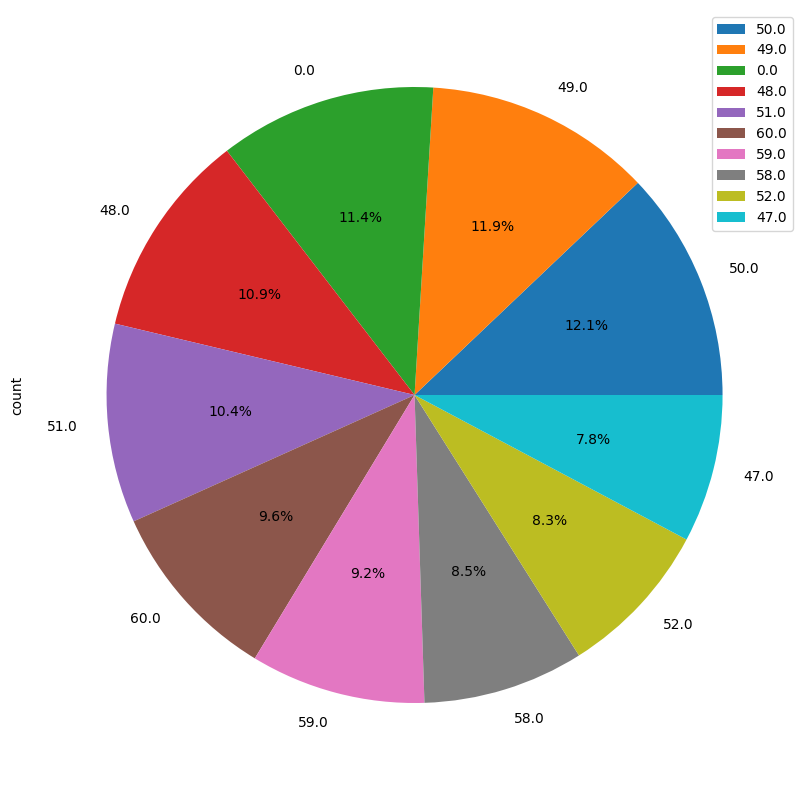

In [23]:
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

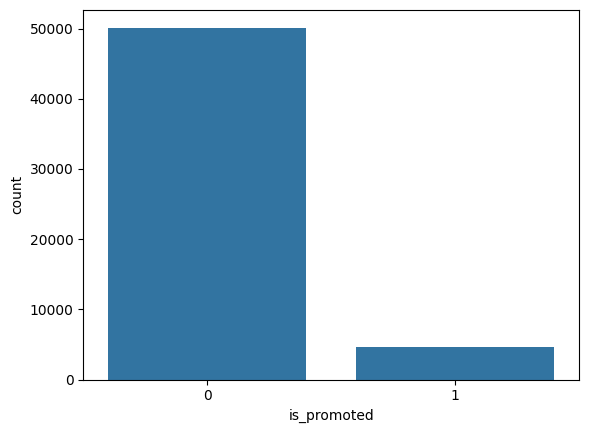

In [24]:
sns.countplot(data= data, x = "is_promoted")
plt.show()

In [25]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

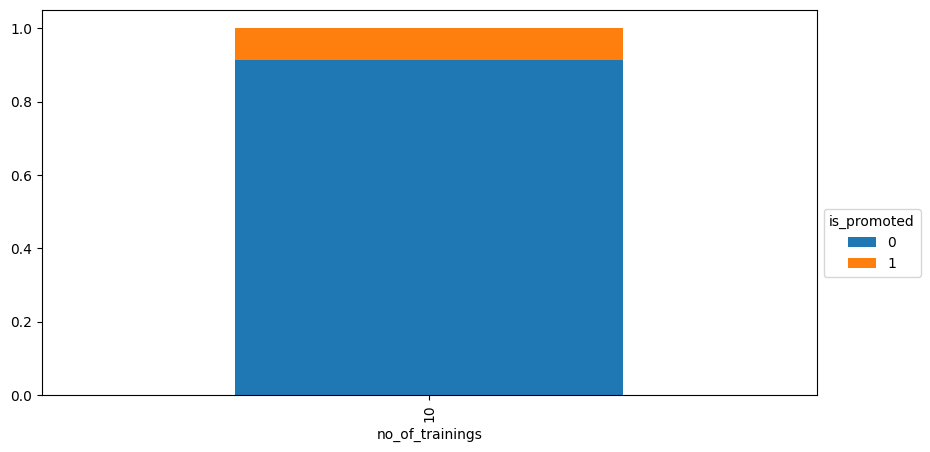

In [26]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.length_of_service,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [ ]:
data.select_dtypes(include='object')

In [ ]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['department'])
data['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['region'])
data['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['gender'])
data['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'].astype(str))
data['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'age', bins=20)

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

In [ ]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)


In [ ]:
current=len(data)
print('Rows of data before Delecting ', current)

In [ ]:
data=data.drop_duplicates()

In [ ]:
now=len(data)
print('Rows of data before Delecting ', now)

In [ ]:
diff=current-now
print('Duplicated rows deleted ', diff)

In [ ]:
data=data.drop(columns=['employee_id'])

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().sum().sum()/len(data)

In [ ]:
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
missing_data.style.bar(color = ['gold'])

In [ ]:
py['length_of_service'].value_counts()

In [ ]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

In [ ]:
sns.countplot(data= data, x = y_up)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)


In [ ]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')


In [ ]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

In [ ]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')

In [ ]:
data["is_promoted"].value_counts()

In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

In [ ]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

In [ ]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')


In [ ]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')
